In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# HISTORICAL DATA

The asset for under review is Litecoin (LTC-USD) with data showing a one-year period.

In [7]:
data = yf.download("LTC-USD", start="2021-04-01", end="2022-04-01")#Download data from yahoo finance for Litecoin

[*********************100%***********************]  1 of 1 completed


In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,196.688950,199.282684,189.491013,197.499100,197.499100,3416343750
2021-04-01,197.524368,205.466995,195.942993,204.112518,204.112518,3871809467
2021-04-02,204.053619,214.403564,202.508560,213.228394,213.228394,4095228243
2021-04-03,213.159744,218.240234,197.146210,197.148209,197.148209,4020429578
2021-04-04,197.109772,206.219879,195.534042,204.042908,204.042908,2866830149


In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-27,124.889275,129.397476,123.675545,129.397476,129.397476,740569100
2022-03-28,129.400635,132.412476,127.852745,127.938614,127.938614,943699101
2022-03-29,127.911484,131.786041,127.729424,130.061234,130.061234,837905297
2022-03-30,130.054733,133.906784,127.102615,131.169342,131.169342,928949835
2022-03-31,131.166367,132.776428,122.522713,123.716011,123.716011,1352615724


In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,172.784978,179.956072,164.763482,172.513753,172.513753,2.727119e+09
std,54.758793,59.142868,50.224540,54.728703,54.728703,2.436566e+09
min,98.861572,102.160332,92.612610,98.869263,98.869263,5.350115e+08
25%,132.815456,136.837490,127.760254,132.318348,132.318348,1.150185e+09
50%,163.677071,169.870934,154.561317,163.251099,163.251099,1.989419e+09
75%,195.522045,201.265545,185.916054,195.099480,195.099480,3.074371e+09
max,387.869171,412.960144,345.298828,386.450775,386.450775,1.325412e+10


# Spot Price for Asset

In [11]:
S = data['Adj Close'][-1]
print('The spot price for LTC-USD is', round(S,2))

The spot price for LTC-USD is 123.72


# Date of minimum closing price

In [12]:
data[data["Adj Close"] == data["Adj Close"].min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-07,101.595879,103.662041,97.236954,98.869263,98.869263,756482342


In [13]:
data['Adj Close'].head()

Date
2021-03-31    197.499100
2021-04-01    204.112518
2021-04-02    213.228394
2021-04-03    197.148209
2021-04-04    204.042908
Name: Adj Close, dtype: float64

# Litecoin price movement over one-year period

Text(0.5, 1.0, 'Litecoin Price')

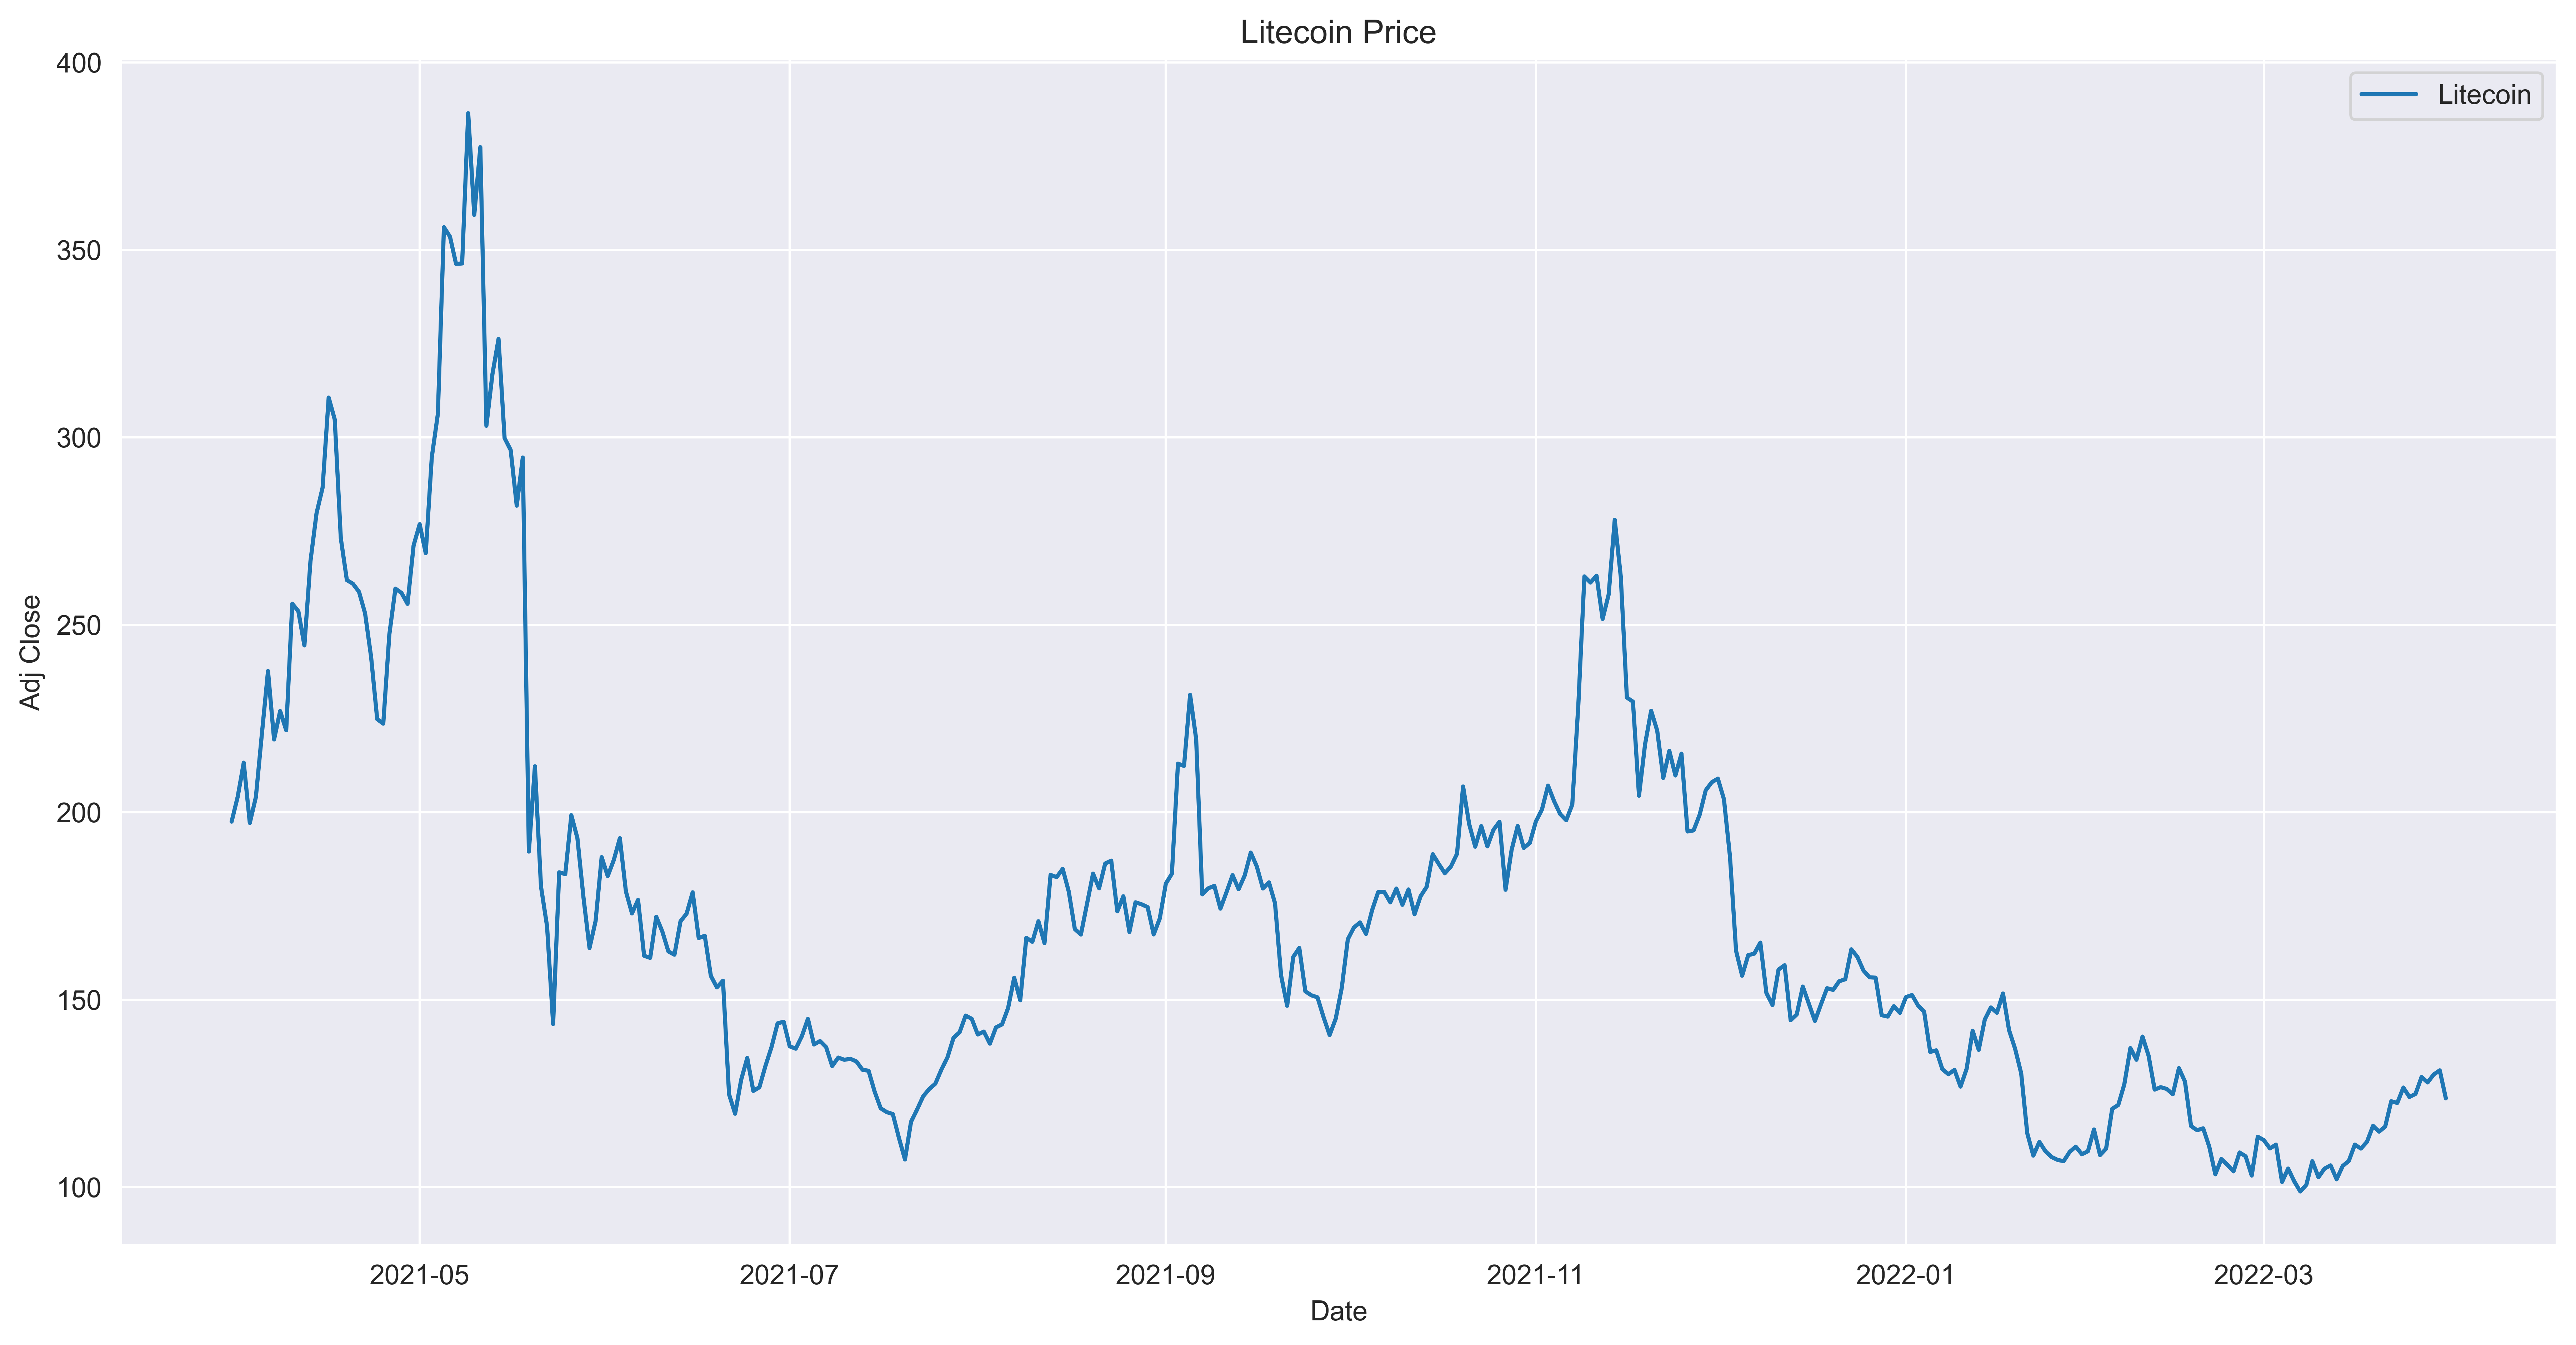

In [14]:
plt.figure(figsize=[16, 8], facecolor="w", dpi=550)
sns.set_style(style="darkgrid")
sns.lineplot(data.index, data["Adj Close"])
#sns.lineplot(data.index, data["Adj Close"].rolling(window=20).mean())
plt.legend(["Litecoin","Moving Average"])
plt.title("Litecoin Price")

In [15]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.03348581633077991,
 0.044661029708483055,
 -0.07541296291949642,
 0.03497216203487456,
 0.08344391136328352]

In [16]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.03293737612754386,
 0.043692459311610914,
 -0.07840808755603221,
 0.03437452977095059,
 0.08014477449218772]

In [17]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized log return is 0.15111785 and its annulized volatility is 1.09422376


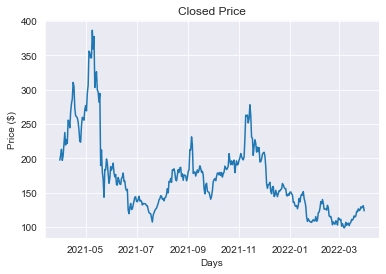

In [18]:
fig = plt.figure()
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

# Q2. Designing a derivative

Binary Pricing Option

Binomial Tree

In [19]:
S0 = 123.72             # spot assest price 
K = 130.0               # strike
T = 1/52                # maturity 
r = 0.0166              # risk free rate 
sig = 1.09              # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [20]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u     

In [21]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [22]:
S

array([[123.72      , 135.0021618 , 147.31315624, 160.74680371],
       [  0.        , 113.38069106, 123.72      , 135.0021618 ],
       [  0.        ,   0.        , 103.90544056, 113.38069106],
       [  0.        ,   0.        ,   0.        ,  95.22203893]])

In [23]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.47880529682219775

In [24]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 16.61930894],
       [ 0.        ,  0.        ,  0.        , 34.77796107]])

In [25]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[11.40494915,  4.51357352,  0.        ,  0.        ],
       [ 0.        , 17.73816935,  8.66097412,  0.        ],
       [ 0.        ,  0.        , 26.08072684, 16.61930894],
       [ 0.        ,  0.        ,  0.        , 34.77796107]])

In [26]:
print('European ' + payoff, str( V[0,0]))

European put 11.404949148840103


# Monte Carlo Simulation

In [27]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [28]:
T = 1/52       #option time period
r = 0.0166     #Risk free rate
sigma = 1.09   #Volatility rate
S0 = 123.72    #Spot price
K = 130.00     #Strike price

In [29]:
S = mcs_simulation_np(1000)

In [30]:
S = np.transpose(S)
S

array([[123.72      , 123.3125099 , 123.85944399, ..., 128.02046191,
        127.66411329, 127.48218683],
       [123.72      , 123.75341059, 124.17593709, ..., 107.46656733,
        106.22798334, 106.23944962],
       [123.72      , 123.92701124, 123.74821868, ..., 144.71301511,
        143.97726819, 143.86706714],
       ...,
       [123.72      , 123.49442148, 123.22005646, ..., 125.76718854,
        125.55613419, 125.54753953],
       [123.72      , 123.63272794, 123.43373579, ..., 117.33845539,
        116.41214419, 116.02533304],
       [123.72      , 123.43609739, 123.70362476, ..., 128.00290971,
        127.86357502, 127.84914948]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

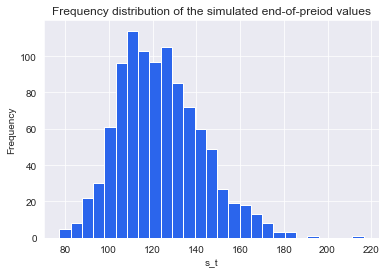

In [31]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#2B65EC',alpha=1, rwidth=2.5)

plt.grid(axis='y', alpha=0.95)
plt.xlabel('s_t')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [32]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 11.488393853618868


# Black Scholes Model

European Option for non-dividend paying coin

In [33]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [34]:
euro_option_bs(123.72, 130, 1/52, 0.0166, 1.09, 'put')
print('European BSM put', str(p))

European BSM put 11.488393853618868


# Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.


In [35]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [36]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 130, T[i], 0.0166, 0, 1.09, 'call')

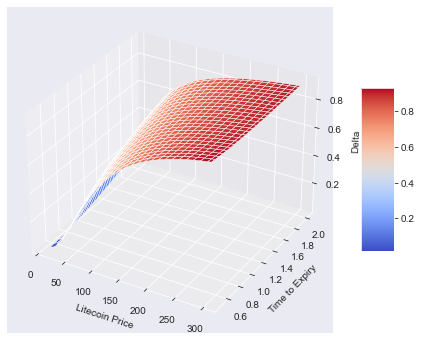

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [38]:
d = delta(123.72, 130, 1/52, 0.0166, 0, 1.09, 'put')#Delta for one-week option
print('The value of Delta is', d.round(4),'.','If Litecoin price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is -0.5987 . If Litecoin price increase 1 dollar, then the value of the option will increase $ -0.5987 .


# Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [39]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [40]:
gamma(123.72, 130, 1/52, 0.0166, 0, 1.09, 'put')#Gamma for one-week option
print('The Gamma for the put option is', d.round(4),'.','If Litecoin price increase by 1 dollar, then the value of the gamma will decrease $', d.round(4), '.')

The Gamma for the put option is -0.5987 . If Litecoin price increase by 1 dollar, then the value of the gamma will decrease $ -0.5987 .


In [41]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 130, T[i], 0.0166, 0, 1.09, 'call')

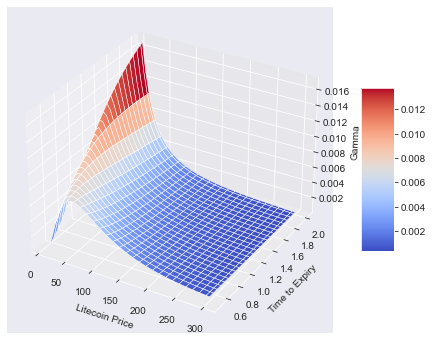

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [43]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [44]:
speed (123.72, 130, 1/52, 0.0166, 0, 1.09, 'put')

1.5136568187439088e-05

In [45]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 130, T[i], 0.0166, 0, 1.09, 'put')

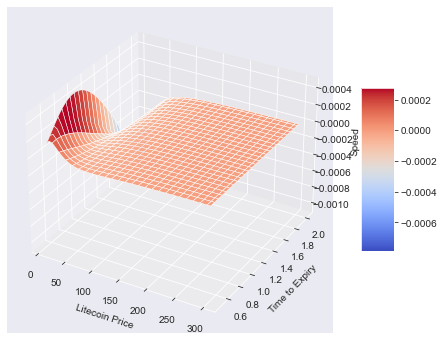

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [47]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [48]:
theta(123.72, 130, 1/52, 0.0166, 0, 1.09, 'put')

189.42863883660488

In [49]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 130, T[i], 0.0166, 0, 1.09, 'call')

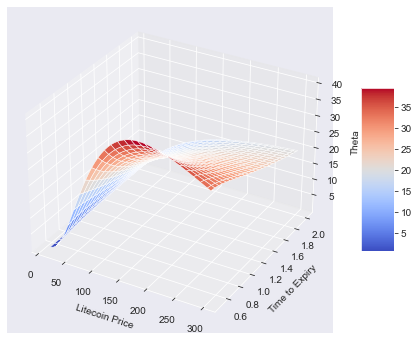

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [51]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [52]:
rho(123.72, 130, 1/52, 0.0166, 0, 1.09, 'put')

-1.6389809746385966

In [53]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 130, T[i], 0.0166, 0, 1.09, 'put')

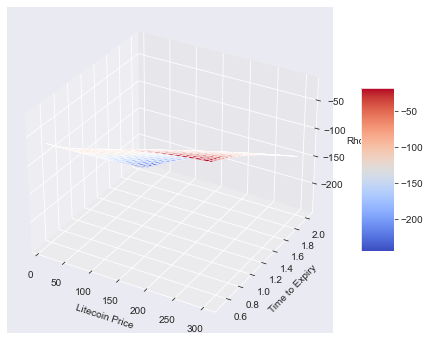

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [55]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega



In [56]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 130, T[i], 0.0166, 0, 1.09, 'call')

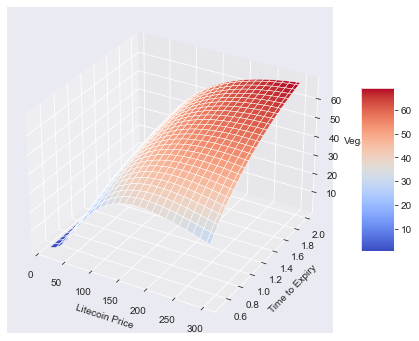

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [58]:
v = vega(123.72, 130, 1/52, 0.0166, 0, 1.09, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases by 1%, then the value of the option will increase by $', v.round(4)*0.01, '.')

The value of Vega is 6.6342 . If the volatility increases by 1%, then the value of the option will increase by $ 0.066342 .
